In [56]:
import numpy as np
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse import csr_matrix
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [53]:
music = pd.read_csv('data.csv')

In [32]:
music.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [74]:
music.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [34]:
music = music.drop('release_date', axis ='columns')

In [35]:
music

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055


In [36]:
select = music['year'] > 2013
music = music[select]
music = music.reset_index(drop=True)

In [37]:
music

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.591,2014,0.04890,['Ariana Grande'],0.525,204093,0.621,0,0lizgQ7Qw35od7CYaoMBZb,0.000000,7,0.2940,-7.364,1,Santa Tell Me,86,0.1160,191.900
1,0.463,2014,0.30100,['J. Cole'],0.692,292987,0.521,1,62vpWI1CHwFy7tMIcSStl8,0.000000,10,0.0565,-8.465,0,No Role Modelz,84,0.3300,100.450
2,0.510,2014,0.43100,['Vance Joy'],0.484,204280,0.731,0,3JvrhDOgAt6p7K8mDyZwRd,0.000000,1,0.1510,-6.694,1,Riptide,78,0.0379,101.654
3,0.584,2014,0.07510,['J. Cole'],0.517,239320,0.705,1,6Ius4TC0L3cN74HT7ENE6e,0.000000,6,0.1280,-8.205,0,Wet Dreamz,79,0.3640,175.906
4,0.211,2014,0.22000,"['Ty Dolla $ign', 'The Weeknd', 'Wiz Khalifa',...",0.805,242983,0.330,1,7t2bFihaDvhIrd2gn2CWJO,0.000000,1,0.1050,-8.712,0,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...",80,0.1000,121.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13845,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029
13846,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936
13847,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688
13848,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055


In [38]:
music_aux = music

In [39]:
music_aux = music_aux.drop(['artists','id','name'], axis ='columns')

In [40]:
music_aux

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.591,2014,0.04890,0.525,204093,0.621,0,0.000000,7,0.2940,-7.364,1,86,0.1160,191.900
1,0.463,2014,0.30100,0.692,292987,0.521,1,0.000000,10,0.0565,-8.465,0,84,0.3300,100.450
2,0.510,2014,0.43100,0.484,204280,0.731,0,0.000000,1,0.1510,-6.694,1,78,0.0379,101.654
3,0.584,2014,0.07510,0.517,239320,0.705,1,0.000000,6,0.1280,-8.205,0,79,0.3640,175.906
4,0.211,2014,0.22000,0.805,242983,0.330,1,0.000000,1,0.1050,-8.712,0,80,0.1000,121.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13845,0.608,2020,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029
13846,0.734,2020,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936
13847,0.637,2020,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688
13848,0.195,2020,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055


In [ ]:
def min_max(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [58]:
teste = min_max(music_aux)
teste['popularity'] = teste['popularity']*1.2
teste['energy'] = teste['energy']*1
teste['acousticness'] = teste['acousticness']*1
teste['danceability'] = teste['danceability']*1
teste = teste.drop(['year','key','mode','explicit'],axis = 'columns')
teste

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo
0,0.595166,0.049096,0.532995,0.205408,0.620992,0.000000,0.297872,0.849857,1.032,0.126362,0.871880
1,0.466264,0.302209,0.702538,0.310642,0.520990,0.000000,0.057244,0.830147,1.008,0.359477,0.456386
2,0.513595,0.432731,0.491371,0.205630,0.730995,0.000000,0.152989,0.861851,0.936,0.041285,0.461856
3,0.588117,0.075402,0.524873,0.247110,0.704994,0.000000,0.129686,0.834801,0.948,0.396514,0.799213
4,0.212487,0.220884,0.817259,0.251447,0.329987,0.000000,0.106383,0.825725,0.960,0.108932,0.554160
...,...,...,...,...,...,...,...,...,...,...,...
13845,0.612286,0.084940,0.797970,0.320973,0.807996,0.000289,0.083283,0.915414,0.864,0.095969,0.477190
13846,0.739174,0.206827,0.727919,0.142146,0.752995,0.000000,0.102330,0.873917,0.816,0.065904,0.626700
13847,0.641490,0.101406,0.643655,0.213916,0.857997,0.000009,0.261398,0.941837,0.912,0.088126,0.416576
13848,0.196375,0.010020,0.681218,0.362919,0.622992,0.000008,0.651469,0.853491,0.840,0.335512,0.341006


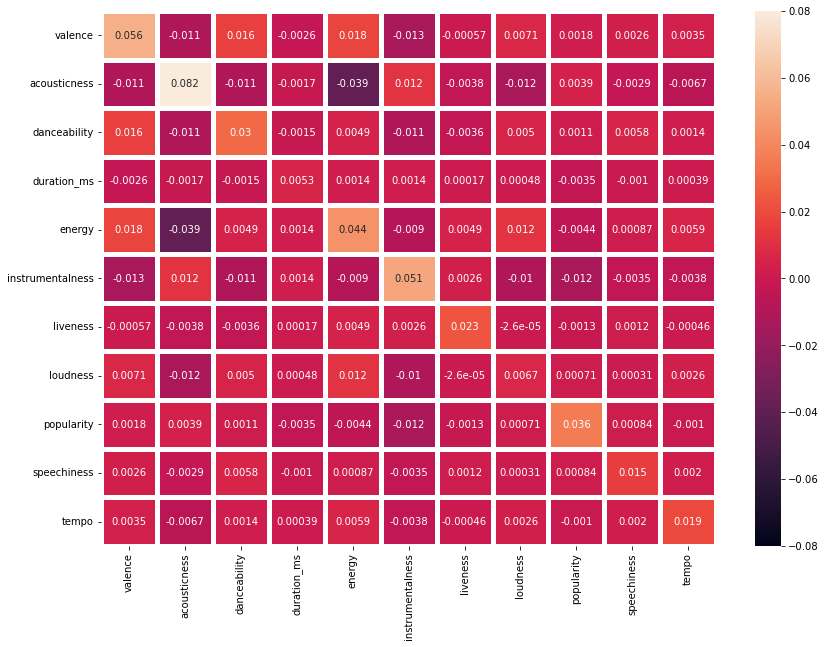

In [69]:
ax = sns.heatmap(teste.cov(),vmin=-0.08, vmax=0.08, annot = True, linewidths = 5, annot_kws={'size': 10})
fig = plt.gcf()
cm = 1/2.54
fig.set_size_inches(35*cm, 25*cm)
plt.show()

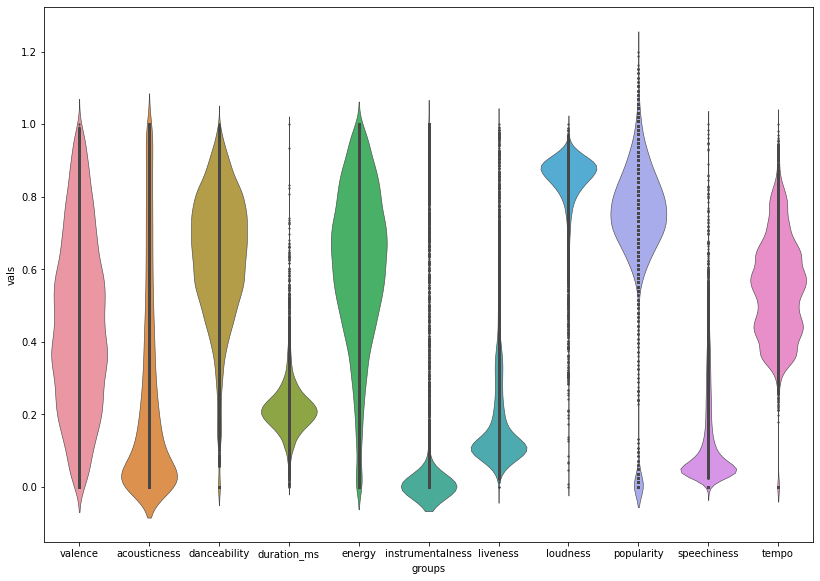

In [73]:
df2 = teste.melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=df2, linewidth = 0.6, inner = 'point', scale= 'width')
fig = plt.gcf()
cm = 1/2.54
fig.set_size_inches(35*cm, 25*cm)
plt.show()

In [42]:
similarity_matrix = linear_kernel(teste,teste)

In [43]:
similarity_matrix

array([[5.12565072, 3.83879401, 4.29472235, ..., 3.73180563, 4.1835676 ,
        4.8676406 ],
       [3.83879401, 5.04266381, 3.13614955, ..., 3.56390068, 4.04454706,
        4.85124909],
       [4.29472235, 3.13614955, 4.13468626, ..., 3.29523985, 3.77932031,
        4.27360186],
       ...,
       [3.73180563, 3.56390068, 3.29523985, ..., 3.71866668, 3.15557788,
        3.76751186],
       [4.1835676 , 4.04454706, 3.77932031, ..., 3.15557788, 5.14292131,
        5.1687069 ],
       [4.8676406 , 4.85124909, 4.27360186, ..., 3.76751186, 5.1687069 ,
        5.97192554]])

In [44]:
mapping = pd.Series(music.index,index = music['name'])

In [45]:
mapping

name
Santa Tell Me                                                      0
No Role Modelz                                                     1
Riptide                                                            2
Wet Dreamz                                                         3
Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix        4
                                                               ...  
China                                                          13845
Halloweenie III: Seven Days                                    13846
AYA                                                            13847
Darkness                                                       13848
Billetes Azules (with J Balvin)                                13849
Length: 13850, dtype: int64

In [46]:
def recomendacao(music_input):
    music_index = mapping[music_input]
    #get similarity values with other movies
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(similarity_matrix[music_index]))
    #sort in descending order the similarity score of movie inputted with all the other movies
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar movies. Ignore the first movie.
    similarity_score = similarity_score[1:15]
    #return movie names using the mapping series
    music_indices = [i[0] for i in similarity_score]
    return (music[['name','artists']].iloc[music_indices])

In [47]:
recomendacao('I Fall Apart')

,name,artists
2076,HUMBLE. - SKRILLEX REMIX,"['Skrillex', 'Kendrick Lamar']"
1285,Godzilla (feat. Juice WRLD),"['Eminem', 'Juice WRLD']"
8146,De Cora <3,"['Rauw Alejandro', 'J Balvin']"
8312,PAM,"['Justin Quiles', 'Daddy Yankee', 'El Alfa']"
2564,Need It,"['Migos', 'YoungBoy Never Broke Again']"
1262,WHATS POPPIN,['Jack Harlow']
12219,Bellacoso,"['Residente', 'Bad Bunny']"
2602,Savage,['Megan Thee Stallion']
1018,BOP,['DaBaby']
5493,Madrid,"['Maluma', 'Myke Towers']"
